<a href="https://colab.research.google.com/github/nelsimelgarejo/INF659-Analisis-de-Sentimiento/blob/main/Copia_de_ProyDL_AnalisisSentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color="#113D68" size=6>TÉCNICAS AVANZANDAS EN DATA MINING</font></h1>

<h1><font color="#113D68" size=5>Proyecto: Análisis de Sentimientos en el dominio financiero</font></h1>
<h1><font color="#113D68" size=5>Grupo:

- Nelsi Melgarejo Vergara
- Andreu Ayaipoma Condori
- Milton Carhuas Ñañez
-
</font></h1>
<h3>Gittub: </h3> <a href="https://github.com/nelsimelgarejo/INF659-Analisis-de-Sentimiento"> https://github.com/nelsimelgarejo/INF659-Analisis-de-Sentimiento</a>

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 1. ENTENDIMIENTO DEL NEGOCIO</font>

### **Objetivo**:

Desarrollar un modelo predictivo de análisis de sentimiento en el contexto financiero

### **Modelos**:
FinBERT es un modelo de PNL previamente entrenado para analizar el sentimiento del texto financiero. Se construye mediante la entrenamiento adicional del modelo de lenguaje BERT en el dominio de las finanzas, utilizando un gran corpus financiero y, por lo tanto, ajustándolo para la clasificación del sentimiento financiero. Para obtener más información, consulte FinBERT: Análisis de sentimiento financiero con modelos lingüísticos previamente entrenados.

Nota importante: la implementación de FinBERT se basa en la biblioteca pytorch_pretrained_bert de Hugging Face y su implementación de BERT para tareas de clasificación. pytorch_pretrained_bert es una versión anterior de la biblioteca de transformers. 

El modelo de análisis de sentimientos de FinBERT ahora está disponible en el hub de modelos Hugging Face. Puede ser conseguido el modelo [aquí](https://huggingface.co/ProsusAI/finbert).

En forma alternativa, se puede descargar los modelos desde los siguientes enlaces:
*   [Language model trained on TRC2](https://prosus-public.s3-eu-west-1.amazonaws.com/finbert/language-model/pytorch_model.bin)
*   [Sentiment analysis model trained on Financial PhraseBank](https://prosus-public.s3-eu-west-1.amazonaws.com/finbert/finbert-sentiment/pytorch_model.bin)

### **Datasets**:

Hay dos conjuntos de datos utilizados para FinBERT: 

El entrenamiento de modelamiento de lenguaje se realiza en un subconjunto del conjunto de datos Reuters TRC2. Este conjunto de datos no es público, pero los investigadores pueden solicitar acceso [aquí](https://trec.nist.gov/data/reuters/reuters.html).

Para el análisis de sentimiento, se utiliza el Financial PhraseBank de Malo et al. (2014). Este conjunto de datos se puede descargar desde este [enlace](https://www.researchgate.net/publication/251231364_FinancialPhraseBank-v10). Si desea entrenar el modelo en el mismo conjunto de datos, después de descargarlo, se debe crear tres archivos en la carpeta data/sentiment_data como train.csv, validation.csv, test.csv

### **Artículo de Referencia**:

*   Repositorio GitHub clonado para el proyecto: 
https://github.com/nelsimelgarejo/DL
*   Repositorio GitHub original del artículo de referencia: https://github.com/ProsusAI/finBERT
*   Enlaces del artículo de referencia: 
> https://paperswithcode.com/paper/finbert-financial-sentiment-analysis-with-pre

  > https://arxiv.org/pdf/1908.10063v1.pdf










---
<a id="section0"></a>
# <font color="#004D7F" size=6>2. ENTENDIMIENTO DE LOS DATOS</font>

<a id="section23"></a>
## <font color="#004D7F"> 2.1. Importación de Librerías solo para Modelo de Línea Base (desde Google Drive)</font>

In [ ]:
# Ubicacion del directorio actual
!pwd
print('\n')

# Listar archivos de carpeta "finbert" del directorio del proyecto ubicado en Google Drive
!ls -ltrh /drive/MyDrive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/finbert/
print('\n')

# File GitHub Repository https://github.com/nelsimelgarejo/DL/finbert: finbert.pyb
# Descargar archivo desde URL a carpeta "finbert" del directorio del proyecto
!wget https://raw.githubusercontent.com/nelsimelgarejo/DL/master/finbert/finbert.py -P /drive/MyDrive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/finbert/ # se descarga el archivo finbert.py a la ubicación del directorio actual

# File GitHub Repository https://github.com/nelsimelgarejo/DL/finbert: utils.py
# Descargar archivo desde URL a carpeta "finbert" del directorio del proyecto
!wget https://raw.githubusercontent.com/nelsimelgarejo/DL/master/finbert/utils.py -P /drive/MyDrive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/finbert/ # se descarga el archivo finbert.py a la ubicación del directorio actual

# Listar archivos de carpeta "finbert" del directorio del proyecto ubicado en Google Drive
!ls -ltrh /drive/MyDrive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/finbert/
print('\n')

# Cambiar ubicacion a directorio del proyecto ubicado en Google Drive
%cd /drive/MyDrive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/

# Ubicacion del directorio actual
!pwd

/content


ls: cannot access '/drive/MyDrive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/finbert/': No such file or directory


--2021-06-30 04:13:30--  https://raw.githubusercontent.com/nelsimelgarejo/DL/master/finbert/finbert.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25892 (25K) [text/plain]
Saving to: ‘/drive/MyDrive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/finbert/finbert.py’

finbert.py          100%[===================>]  25.29K  --.-KB/s    in 0.003s  

2021-06-30 04:13:30 (7.96 MB/s) - ‘/drive/MyDrive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/finbert/finbert.py’ saved [25892/25892]

--2021-06-30 04:13:30--  https://raw.githubusercontent.com/nelsimelgarejo/DL/master/

In [ ]:
!pip install transformers -q
!pip install bert-tensorflow -q

from textblob import TextBlob
from pprint import pprint
from sklearn.metrics import classification_report

from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer

#from finbert.finbert import *
from finbert import *
import finbert.utils as tools
#import utils as tools

# Verificar importacion (se debe usar para invocar clases Config y FinBert posteriormente)
# from finbert.finbert import *
# from finbert.finbert import Config
# from finbert.finbert import FinBert


import pandas as pd
import shutil
import logging
from pathlib import Path
import os
import sys

# print(sys.path)
# print('----1\n')

# Adicionar '..' como un valor de ruta de directorio a la variable de sistema de Python
sys.path.append('..')
print(sys.path)
print('----2\n')

# print(Path.cwd())
# print('----3\n')


%load_ext autoreload
%autoreload 2

# Imprimir ubicacion de directorio actual
print(Path.cwd())
print('----4\n')

# Guardar en variable la ubicacion del directorio padre correspondiente al directorio actual
#project_dir = Path.cwd().parent

# Guardar en variable la ubicacion del directorio del proyecto
project_dir = Path.cwd()
pd.set_option('max_colwidth', -1)

print(project_dir)
print('----5\n')

In [ ]:
logging.basicConfig(format = '%(asctime)s - %(levelname)s - %(name)s -   %(message)s',
                    datefmt = '%m/%d/%Y %H:%M:%S',
                    level = logging.ERROR)

In [ ]:
# Ubicacion del directorio actual
!pwd
print('\n')

# Listar archivos de carpeta "finbertTRC2" del directorio del proyecto ubicado en Google Drive
!ls -ltrh /drive/MyDrive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/models/language_model/finbertTRC2/
print('\n')

# File GitHub Repository https://github.com/nelsimelgarejo/DL: config.json
# Descargar archivo desde URL a carpeta "finbertTRC2" dentro del directorio del proyecto
!wget https://raw.githubusercontent.com/nelsimelgarejo/DL/master/config.json -P /drive/MyDrive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/models/language_model/finbertTRC2/ # se descarga el archivo config.json a la ubicación del directorio indicado


# File GitHub Repository https://github.com/nelsimelgarejo/DL: config.json
# Descargar archivo desde URL a carpeta "finbert-sentiment" dentro del directorio del proyecto
!wget https://raw.githubusercontent.com/nelsimelgarejo/DL/master/config.json -P /drive/MyDrive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/models/classifier_model/finbert-sentiment/ # se descarga el archivo config.json a la ubicación del directorio indicado

# Listar archivos de carpeta "finbertTRC2" del directorio del proyecto ubicado en Google Drive
!ls -ltrh /drive/MyDrive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/models/language_model/finbertTRC2/
print('\n')

# Cambiar ubicacion a directorio del proyecto ubicado en Google Drive
%cd /drive/MyDrive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/

# Ubicacion del directorio actual
!pwd

<a id="section23"></a>
## <font color="#004D7F"> 2.2. Importación de Librerías Estándar</font>

In [ ]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py
!pip install sentencepiece -q

     |████████████████████████████████| 1.2MB 34.0MB/s 


In [ ]:
import tokenization

from wordcloud import WordCloud

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import os
import logging
logging.basicConfig(level=logging.INFO)

import tensorflow as tf
import tensorflow_hub as hub
#import keras.utils
from keras.utils import np_utils
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

ModuleNotFoundError: ignored

In [ ]:
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity ='last_expr'
InteractiveShell.ast_node_interactivity = "all"
np.set_printoptions(edgeitems=3, linewidth=80) #(por defecto)
#np.set_printoptions(edgeitems=100, linewidth=1000)

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


#### Declaración de Variables Globales de Archivos y Directorios

In [ ]:
DIR_PROYECTO = "/drive/My Drive/PUCP-Maestria-Inf-CS/INF659-TecnicasAvanzadasDataMining/Proyecto_DL/"
#DIR_PROYECTO = "/drive/.shortcut-targets-by-id/1eSPuywHaCL56KeawPiMYWYj47Ewy_qqw/Proyecto_DL"
DIR_DATASET = "data/"

DIR_DATASET_DIV = DIR_DATASET + "sentiment_data/"

# Dataset: Financial Phrase Bank
# Conjunto de noticias financieras y comunicados de prensa sobre empresas finlandesas que cotizan en Bolsa de Valores
FILE_CORPUS_1 = "Sentences_50Agree.txt"
FILE_CORPUS_2 = "Sentences_66Agree.txt"
FILE_CORPUS_3 = "Sentences_75Agree.txt"
FILE_CORPUS_4 = "Sentences_AllAgree.txt"

FILE_DATASET_TRAIN = "train.csv"
FILE_DATASET_VALID = "validation.csv"
FILE_DATASET_TEST = "test.csv"

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Importación Datos</font>

In [ ]:
df_data = pd.read_csv(DIR_PROYECTO + DIR_DATASET + FILE_CORPUS_1, sep='.@', names=['text','label'], engine='python')
print('Tamaño del conjunto de datos: ', df_data.shape)
df_data.head()

Tamaño del conjunto de datos:  (4846, 2)


,text,label
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


<a id="section23"></a>
## <font color="#004D7F"> 2.4. Análisis Exploratorio de Datos</font>

#### **Variable Objetivo: label**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


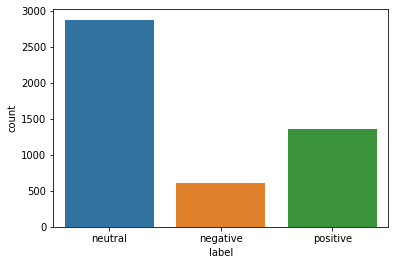

In [ ]:
# Gráfica de Barras para categorías de la variable objetivo
sns.countplot(df_data['label'])

In [ ]:
df = pd.concat([df_data['label'].value_counts(), df_data['label'].value_counts(normalize=True).mul(100)], 
               axis=1, 
               keys=('Cantidad','Porcentaje')
                )
print(df)

          Cantidad  Porcentaje
neutral       2879   59.409823
positive      1363   28.126290
negative       604   12.463888


#### **Nube de Palabras del corpus completo**

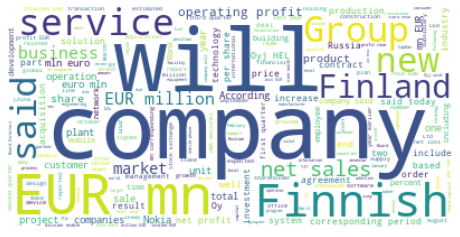

In [ ]:
text = " ".join([x for x in df_data.text])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### **Nube de Palabras del corpus para la categoría "neutral"**

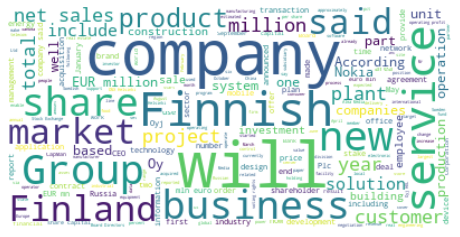

In [ ]:
## for neutral

text = " ".join([x for x in df_data.text[df_data.label=='neutral']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### **Nube de Palabras del corpus para la categoría "negative"**

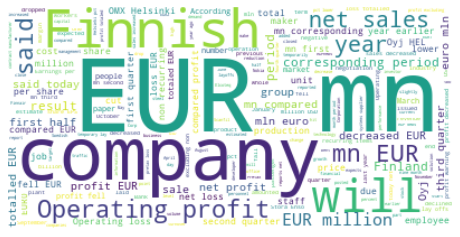

In [ ]:
## for negative

text = " ".join([x for x in df_data.text[df_data.label=='negative']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### **Nube de Palabras del corpus para la categoría "positive"**

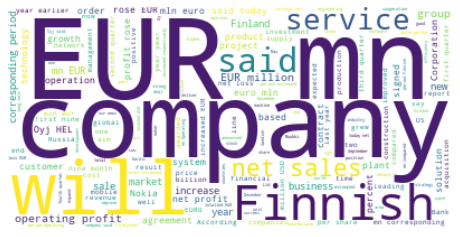

In [ ]:
## for positive

text = " ".join([x for x in df_data.text[df_data.label=='positive']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()